In [92]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25, 13)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 20
%matplotlib inline

In [93]:
df = pd.read_table('../ulm/rnn_results.tsv')
len(df)

2162

In [94]:
df[['result.test_acc', 'model.nb_epoch', 'model.cells', 'featurizer.max_len', 'model.batch_size', 'result.running_time']].sort_values('result.test_acc', ascending=False).head()

,result.test_acc,model.nb_epoch,model.cells,featurizer.max_len,model.batch_size,result.running_time
786,1.0,300.0,25.0,6.0,512.0,0 days 00:00:17.889766
1992,1.0,300.0,5.0,6.0,512.0,0 days 00:00:57.624957
2135,1.0,300.0,10.0,8.0,512.0,0 days 00:01:10.971324
863,1.0,300.0,50.0,7.0,512.0,0 days 00:00:24.600049
1475,1.0,300.0,10.0,6.0,512.0,0 days 00:00:20.264844


In [95]:
df.columns

Index(['featurizer.grep_filter', 'featurizer.label_filter',
       'featurizer.max_len', 'featurizer.max_lines',
       'featurizer.max_sample_per_class', 'global.data_path', 'global.nolog',
       'model.batch_size', 'model.cells', 'model.loss', 'model.lr',
       'model.nb_epoch', 'model.rnn_type', 'result.X_shape',
       'result.batch_size', 'result.class_no', 'result.exception',
       'result.nb_epoch', 'result.running_time', 'result.success',
       'result.test_acc', 'result.timestamp', 'result.train_acc',
       'result.y_shape'],
      dtype='object')

In [96]:
df['misc.sample_size'] = df['result.X_shape'].apply(lambda x: eval(x)[0])
df['misc.sample_size'].value_counts()

20000     1155
60000      276
40000      162
30000       97
110000      96
13333       63
14934       63
19037       63
10529       63
34235       62
29067       62
Name: misc.sample_size, dtype: int64

In [97]:
df['featurizer.max_sample_per_class'].value_counts()
df['result.class_no'] = df['result.y_shape'].apply(lambda x: eval(x)[1])
df['misc.full'] = (df['result.class_no'] * df['featurizer.max_sample_per_class'] == df['misc.sample_size'])

In [98]:
df[df['misc.full'] == False].groupby(['featurizer.label_filter', 'featurizer.grep_filter']).count()

featurizer.max_len  \
featurizer.label_filter featurizer.grep_filter                                                   
('NOUN',)               ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                  62   
                        ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                  62   
('VERB',)               ('<COND',)                                                          63   
                        ('<PAST',)                                                          63   
                        ('<PERS<1', '<PERS<2', '')                                          63   

                                                                            featurizer.max_lines  \
featurizer.label_filter featurizer.grep_filter                                                     
('NOUN',)               ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                    62   
                        ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                    62   
('VERB',)               ('<COND',)                                                            63   
                        ('<PAST',)                                                            63   
                        ('<PERS<1', '<PERS<2', '')                                            63   

                                                                            featurizer.max_sample_per_class  \
featurizer.label_filter featurizer.grep_filter                                                                
('NOUN',)               ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                               62   
                        ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                               62   
('VERB',)               ('<COND',)                                                                       63   
                        ('<PAST',)                                                                       63   
                        ('<PERS<1', '<PERS<2', '')                                                       63   

                                                                            global.data_path  \
featurizer.label_filter featurizer.grep_filter                                                 
('NOUN',)               ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                62   
                        ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                62   
('VERB',)               ('<COND',)                                                        63   
                        ('<PAST',)                                                        63   
                        ('<PERS<1', '<PERS<2', '')                                        63   

                                                                            global.nolog  \
featurizer.label_filter featurizer.grep_filter                                             
('NOUN',)               ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...            62   
                        ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...            62   
('VERB',)               ('<COND',)                                                    63   
                        ('<PAST',)                                                    63   
                        ('<PERS<1', '<PERS<2', '')                                    63   

                                                                            model.batch_size  \
featurizer.label_filter featurizer.grep_filter                                                 
('NOUN',)               ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                62   
                        ('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS'...                62   
('VERB',)               ('<COND',)                                                        63   
                        ('<PAST',)                                                        63   
                

In [104]:
df.groupby(['featurizer.grep_filter']).count()

,featurizer.label_filter,featurizer.max_len,featurizer.max_lines,featurizer.max_sample_per_class,global.data_path,global.nolog,model.batch_size,model.cells,model.loss,model.lr,...,result.exception,result.nb_epoch,result.running_time,result.success,result.test_acc,result.timestamp,result.train_acc,result.y_shape,misc.sample_size,misc.full
featurizer.grep_filter,,,,,,,,,,,,,,,,,,,,,
"('<ACC',)",0,16,16,16,16,16,16,16,16,16,...,0,0,16,16,16,16,16,16,16,16
"('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS', '<CAS<SBL')",16,16,16,16,16,16,16,16,16,16,...,0,0,16,16,16,16,16,16,16,16
"('<CAS<ACC', '<CAS<DAT', '<CAS<INE', '<CAS<INS', '<CAS<SBL', '<CAS<SUE', '<CAS<ALL', '<CAS<ILL', '<CAS<ELA', '<CAS<DEL')",16,16,16,16,16,16,16,16,16,16,...,0,0,16,16,16,16,16,16,16,16
"('<COND',)",16,16,16,16,16,16,16,16,16,16,...,0,0,16,16,16,16,16,16,16,16
"('<PAST',)",16,16,16,16,16,16,16,16,16,16,...,0,0,16,16,16,16,16,16,16,16
"('<PERS<1', '<PERS<2', '')",16,16,16,16,16,16,16,16,16,16,...,0,0,16,16,16,16,16,16,16,16
"('<PLUR',)",16,32,32,32,32,32,32,32,32,32,...,0,0,32,32,32,32,32,32,32,32


In [107]:
df[(df['featurizer.grep_filter'].isnull() == False) & (df['featurizer.grep_filter'].str.contains("ACC"))]['featurizer.label_filter'].value_counts()

('NOUN',)    32
Name: featurizer.label_filter, dtype: int64

In [99]:
df['misc.sample_size'].value_counts()
(df['result.y_shape'].apply(lambda x: eval(x)[1]) * df['featurizer.max_sample_per_class'] < df['misc.sample_size']).value_counts()

False    2162
dtype: int64

In [100]:
df = df[
    (df['featurizer.max_sample_per_class'] == 10000)
    & (df['model.nb_epoch'] == 300)
    & (df['model.cells'] == 10)
    & (df['model.rnn_type'] == 'gru')
]
groups = df.groupby(['featurizer.label_filter', 'featurizer.grep_filter']) #.plot(x='featurizer.max_len', y='result.test_acc', kind='bar')
for name, group in groups:
    #group.plot(x='featurizer.max_len', y='result.test_acc', kind='bar', title=name)
    pass

In [101]:
df.columns
params = ['featurizer.grep', 'featurizer.label_filter', 'featurizer.max_len', 'model.cells']

In [148]:
a = pd.DataFrame([{'p1': 11, 'p2': 22, 'p3': 33, 'typ': 'A', 'acc': 13}, {'p1': 11, 'p2': 22, 'typ': 'B', 'acc': 14}])
a = a.append({'p1': 11, 'p2': 23, 'acc': 13}, ignore_index=True)
a

,acc,p1,p2,p3,typ
0,13.0,11.0,22.0,33.0,A
1,14.0,11.0,22.0,NaN,B
2,13.0,11.0,23.0,NaN,NaN


In [161]:
a = pd.DataFrame([{'p1': 11, 'p2': 22, 'p3': 33, 'typ': 'A', 'acc': 13}, {'p1': 11, 'p2': 22, 'typ': 'B', 'acc': 14}])
a = a.append({'p1': 11, 'p2': 23, 'acc': 13}, ignore_index=True)
a = a.set_index('typ', append=True)
a = a.unstack('typ')
#a = a.stack(['p1']) #, 'p2', 'p3'])
a

acc                p1                p2              p3          
typ   NaN     A     B   NaN     A     B   NaN     A     B NaN     A   B
0     NaN  13.0   NaN   NaN  11.0   NaN   NaN  22.0   NaN NaN  33.0 NaN
1     NaN   NaN  14.0   NaN   NaN  11.0   NaN   NaN  22.0 NaN   NaN NaN
2    13.0   NaN   NaN  11.0   NaN   NaN  23.0   NaN   NaN NaN   NaN NaN

In [163]:
datelisttemp = pd.date_range('1/1/2014', periods=3, freq='D')
s = list(datelisttemp)*3
s.sort()
df = pd.DataFrame({'BORDER':['GERMANY','FRANCE','ITALY','GERMANY','FRANCE','ITALY','GERMANY','FRANCE','ITALY' ], 'HOUR1':[2 ,2 ,2 ,4 ,4 ,4 ,6 ,6, 6],'HOUR2':[3 ,3 ,3, 5 ,5 ,5, 7, 7, 7], 'HOUR3':[8 ,8 ,8, 12 ,12 ,12, 99, 99, 99]}, index=s)

df = df.set_index(['BORDER'], append=True)
df.columns.name = 'HOUR'
df = df.unstack('BORDER')
df = df.stack('HOUR')
#df = df.reset_index('HOUR')
#df['HOUR'] = df['HOUR'].str.replace('HOUR', '').astype('int')
df

BORDER            FRANCE  GERMANY  ITALY
           HOUR                         
2014-01-01 HOUR1       2        2      2
           HOUR2       3        3      3
           HOUR3       8        8      8
2014-01-02 HOUR1       4        4      4
           HOUR2       5        5      5
           HOUR3      12       12     12
2014-01-03 HOUR1       6        6      6
           HOUR2       7        7      7
           HOUR3      99       99     99

In [144]:
z = []
for g, group in a.groupby(['p1', 'p2']):
    print(g)
    #z.append(group.pivot(index=['p1', 'p2'], columns='typ', values='acc'))
    z.append(group.unstack('typ'))
z[0].to_frame()

(11.0, 22.0)
(11.0, 23.0)


0
acc 0   13
    1   14
p1  0   11
    1   11
p2  0   22
    1   22
p3  0   33
    1  NaN
typ 0    A
    1    B

In [137]:
b = a.pivot(index=['p1', 'p2'], columns='typ', values='acc')
b

typ,A,B
p1,13.0,NaN
p2,NaN,14.0


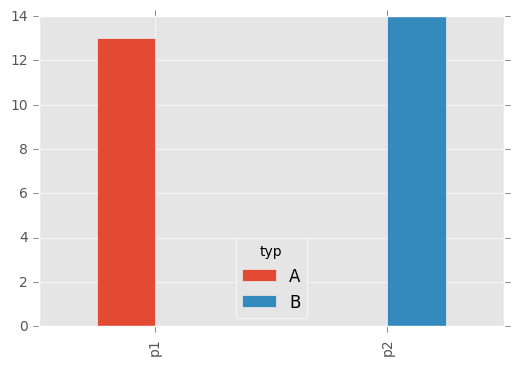

In [120]:
b.plot(y=['A', 'B'], kind='bar')